### 1. Importing the Necessary Libraries :-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Suppress the Warnings :-

In [2]:
import warnings
warnings.filterwarnings("ignore")

### 3. Reading the Dataset :-

In [3]:
df = pd.read_csv(r"C:\Users\Administrator\OneDrive\Housing.csv")

In [4]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### 4. Inspecting the Dataset :-

In [5]:
# to know the # of columns and rows in the dataset

df.shape

(545, 13)

In [6]:
# to know the datatypes and null values for the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
# for statistical analysis of the dataset (only numerical columns)

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### 5. Checking for the Null Values :-

In [8]:
# df.isnull() # this will show True or False if null value is present
# df.isnull().sum()/len(df)*100 # if you want to see the same but in terms of percentage
df.isnull().sum() #this will count all null values present in the dataset

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### 6. Encoding ( Conversion of Categorical / Object columns to Numeric values

In [9]:
# As we know datatypes for all column should be a number for creating a AI Model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
# to know all object columns for my dataset

df.select_dtypes(include = "object").columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [11]:
# to know distinct value counts of all object columns
# here we can find that which type of encoding we've to be perform in which object column

for cols in df.columns:
    if df[cols].dtype == "object":
        print(cols, ":", df[cols].nunique())

mainroad : 2
guestroom : 2
basement : 2
hotwaterheating : 2
airconditioning : 2
prefarea : 2
furnishingstatus : 3


#### **`distinct value of 2 are good contender for binary encoding (0 and 1)`**
#### **`distinct value of <10 are good contender for one-hot encoding or dummy variable creation`**

In [12]:
# let's start inspecting all elegible columns for binary encoding

df["mainroad"].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [13]:
df[["mainroad", "guestroom", "basement", "hotwaterheating","airconditioning", "prefarea"]]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [14]:
varlist= ["mainroad", "guestroom", "basement", "hotwaterheating","airconditioning", "prefarea"] # all are classified with yes and no only

In [15]:
# create a function to replace all 'yes'with 1 and 'no' with 0
def Binary_Mapping(x):
    return x.map({"yes" : 1 , "no" : 0})

# Applying the function to the varlist
df[varlist] = df[varlist].apply(Binary_Mapping)

In [16]:
df[["mainroad", "guestroom", "basement", "hotwaterheating","airconditioning", "prefarea"]]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### 7. Creating Dummy Variables for Further Analysis :-

#### As "furnishingstatus" column has more than 2 values so we have to create dummy variables for it.

In [18]:
df["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [19]:
status = pd.get_dummies(df["furnishingstatus"], drop_first=True, dtype = int)

In [20]:
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


### 8. Adding the dummy variables with the original dataset :-

In [21]:
df = pd.concat([df, status], axis = 1)

In [22]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,0,0


In [23]:
df.shape

(545, 15)

### 9. Dropping the unwanted columns :-

In [24]:
df.drop("furnishingstatus", axis = 1, inplace = True) # dropping 'furnishingstatus' because we've created dummy variable for this column

In [25]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


### 10. Creating a Heatmap in order to Check the Correlation ( how is price is related with others) :-

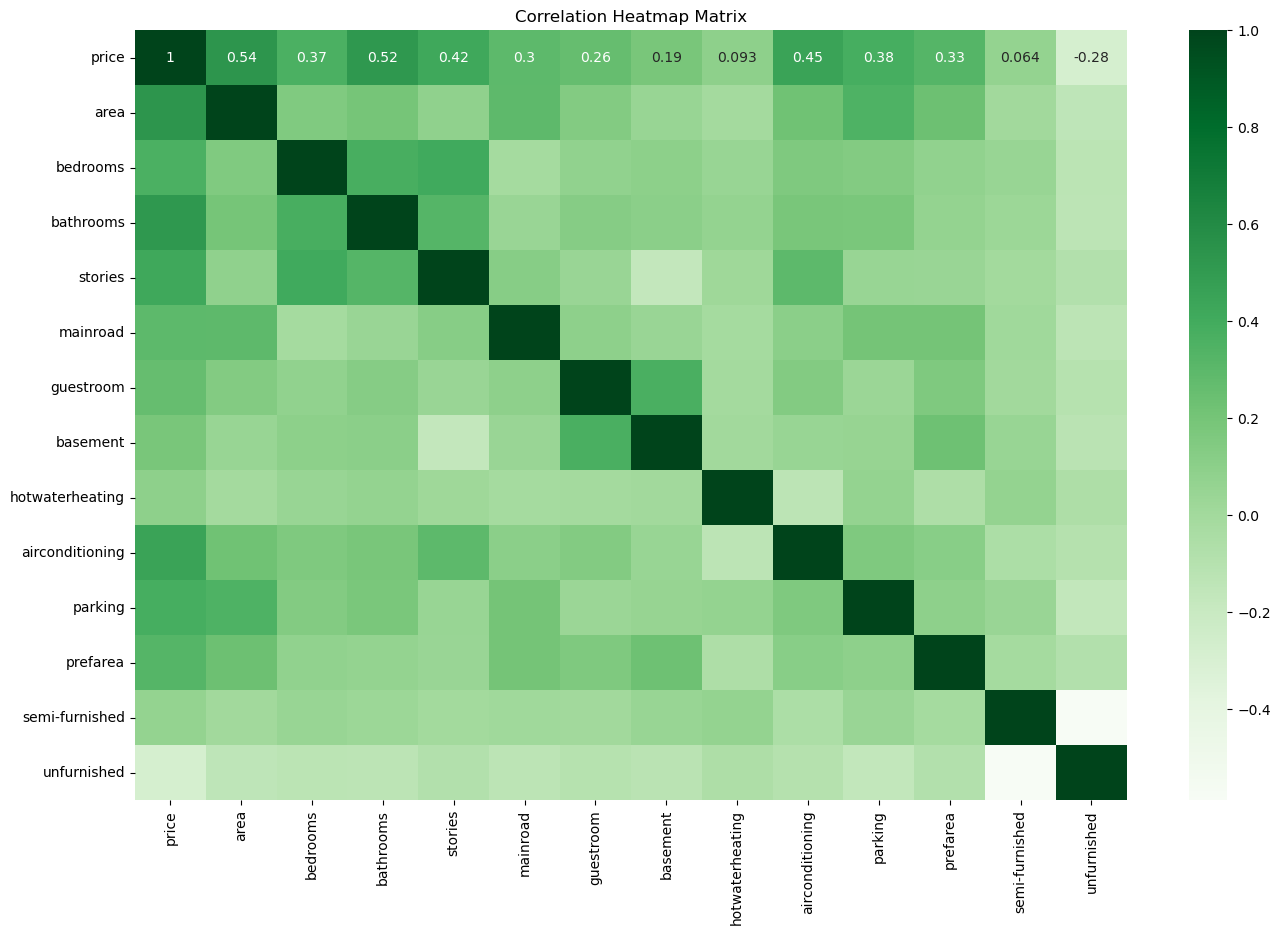

In [26]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot=True, cmap = "Greens")
plt.title("Correlation Heatmap Matrix")
plt.show()

### 11. Checking for the Features that are highly correlated with Price :-

##### Objective is to get all variables whose correlation with Price variable is more than 0.2 or 20%

##### to achieve this we can write a code to evaluate correlation of all variables with price and then select the ones 
##### which are gretaer than threshold value of 0.5

In [27]:
highly_correlated = []


for cols in df.columns:
    x=df[f"{cols}"].corr(df['price']) #f string will actually replace values of each column
    print(cols,'with', 'price', '-', round(x,2))
    if abs(x) >= 0.4: # will add only those columns who is actually corelated above than or equal to 0.4
        highly_correlated.append(f"{cols}")

price with price - 1.0
area with price - 0.54
bedrooms with price - 0.37
bathrooms with price - 0.52
stories with price - 0.42
mainroad with price - 0.3
guestroom with price - 0.26
basement with price - 0.19
hotwaterheating with price - 0.09
airconditioning with price - 0.45
parking with price - 0.38
prefarea with price - 0.33
semi-furnished with price - 0.06
unfurnished with price - -0.28


In [28]:
highly_correlated

['price', 'area', 'bathrooms', 'stories', 'airconditioning']

### 12. Putting features into X and y variables :-

In [29]:
# put all independente columns in X axis

X = df.drop("price", axis=1)

In [30]:
X.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [31]:
# put your targeted column in y axis

y = df[["price"]]

In [32]:
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


### 13. Splitting the dataset into train test split :-

In [33]:
# importing train_test_split method from its family

from sklearn.model_selection import train_test_split

In [34]:
# Split arrays or matrices into random train and test subsets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

# splittig dataset into 80 ans 20 for training then testing

In [35]:
X_train.shape

(436, 13)

In [36]:
X_test.shape

(109, 13)

In [37]:
y_train.shape

(436, 1)

In [38]:
y_test.shape

(109, 1)

### 14. Training the Data (with the appropriate alogorithm from the right family alogrithms) :-

In [39]:
# importing the right algorithm from the right model
from sklearn.linear_model import LinearRegression

# instantiate
Lv = LinearRegression()

### 15. Fitting the model into LinearRegression Fit :-

In [40]:
Lv.fit(X_train, y_train)

LinearRegression()

### 16. Predicting the Model :-

In [41]:
y_pred = Lv.predict(X_test)

In [42]:
y_pred

array([[3973604.61660514],
       [6738024.99243046],
       [5608520.696217  ],
       [5230286.40498512],
       [4808901.20220734],
       [3918294.040407  ],
       [8186276.3381508 ],
       [5758322.27394122],
       [3501669.01091216],
       [5707139.18205881],
       [2969346.83346448],
       [6347708.98782252],
       [4676636.24076065],
       [7388896.11898453],
       [5705349.31053085],
       [6868720.57437679],
       [8276975.07430041],
       [4400557.5117136 ],
       [6091903.51087378],
       [4991450.54602189],
       [4283402.90571562],
       [2728381.27897154],
       [4626720.89628371],
       [3632117.42514947],
       [2681844.96925324],
       [3466632.57642346],
       [5185523.95806725],
       [6591380.33796246],
       [6657276.36010019],
       [4980942.02555194],
       [3064166.028358  ],
       [4545320.64238042],
       [3002572.50910407],
       [2734521.1683769 ],
       [4820794.0859769 ],
       [4692609.99106211],
       [4644127.29136318],
 

In [43]:
y_pred.shape # 109 predictions becaue there I split into y_test which was 109 rows

(109, 1)

### 17. Calculate the R2 Score :-

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_Score = r2_score(y_test, y_pred)

In [46]:
print("r2_score :", r2_Score)

r2_score : 0.6806539407870676
